# Welcome to Jupyter!

This repo contains an introduction to [Jupyter](https://jupyter.org) and [IPython](https://ipython.org).

Outline of some basics:

* [Notebook Basics](../examples/Notebook/Notebook%20Basics.ipynb)
* [IPython - beyond plain python](../examples/IPython%20Kernel/Beyond%20Plain%20Python.ipynb)
* [Markdown Cells](../examples/Notebook/Working%20With%20Markdown%20Cells.ipynb)
* [Rich Display System](../examples/IPython%20Kernel/Rich%20Output.ipynb)
* [Custom Display logic](../examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb)
* [Running a Secure Public Notebook Server](../examples/Notebook/Running%20the%20Notebook%20Server.ipynb#Securing-the-notebook-server)
* [How Jupyter works](../examples/Notebook/Multiple%20Languages%2C%20Frontends.ipynb) to run code in different languages.

You can also get this tutorial and run it on your laptop:

    git clone https://github.com/ipython/ipython-in-depth

Install IPython and Jupyter:

with [conda](https://www.anaconda.com/download):

    conda install ipython jupyter

with pip:

    # first, always upgrade pip!
    pip install --upgrade pip
    pip install --upgrade ipython jupyter

Start the notebook in the tutorial directory:

    cd ipython-in-depth
    jupyter notebook

In [1]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline
from scipy.stats import multivariate_normal

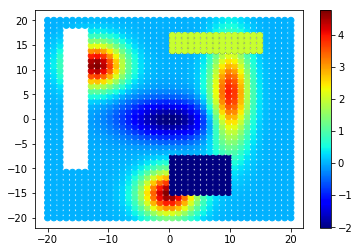

In [30]:
x1 = np.linspace(-20,20,40)
x2 = np.linspace(-20,20,40)

x11, x22 = np.meshgrid(x1,x2)

X = np.hstack((x11.ravel()[:,np.newaxis], x22.ravel()[:,np.newaxis]))

mu0 = [-12,11]; Sig0 = [[10,0],[0,10]]
mu1 = [0,0]; Sig1 = [[30,0],[-1,8]]
mu2 = [10,5]; Sig2 = [[5,0],[0,50]]
mu3 = [0,-15]; Sig3 = [[10,0],[0,10]]
w = [0.3, -0.2, 0.4, 0.3]

y = w[0]*multivariate_normal.pdf(X, mu0, Sig0) \
    + w[1]*multivariate_normal.pdf(X, mu1, Sig1) \
    + w[2]*multivariate_normal.pdf(X, mu2, Sig2) \
    + w[3]*multivariate_normal.pdf(X, mu3, Sig3)
y *= 1000

#blue pit
x1_clip = np.logical_and(X[:,0] > 0, X[:,0] < 10)
x2_clip = np.logical_and(X[:,1] < -7, X[:,1] > -15)
x12_clip = np.logical_and(x1_clip, x2_clip)
y[x12_clip] = -2

#missing data
x1_clip = np.logical_and(X[:,0] > -17, X[:,0] < -13)
x2_clip = np.logical_and(X[:,1] < 18, X[:,1] > -10)
x12_clip = np.logical_and(x1_clip, x2_clip)
y[x12_clip] = -2
X = X[np.logical_not(x12_clip), :]
y = y[np.logical_not(x12_clip)]

#conflicting data
x1_clip = np.logical_and(X[:,0] > 0, X[:,0] < 15)
x2_clip = np.logical_and(X[:,1] < 17, X[:,1] > 13)
x12_clip = np.logical_and(x1_clip, x2_clip)
X = np.vstack((X, X[x12_clip, :]))
y[x12_clip] = -2
y = np.concatenate((y, 2+0*y[x12_clip]))

pl.scatter(X[:,0], X[:,1], c=y, cmap='jet'); pl.colorbar()

#X = np.hstack((X,y))
X = np.hstack((X, y[:,np.newaxis], np.ones((X.shape[0],1))))
np.savetxt('toy2_frame0.csv', X, delimiter=',')

In [ ]:
#X = np.hstack((X,y))
# X = np.hstack((X, y[:,np.newaxis], np.ones((X.shape[0],1))))
# np.savetxt('toy_terrain1.csv', X, delimiter=',')

In [25]:
np.concatenate((y, y[x12_clip])).shape


(1546,)

In [21]:
y.shape

(1516,)

In [18]:
X.shape

(1516, 2)